<font size = '4'><b>Australian Open Machine Learning Model</b></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size = '4'><b>Import and Check Database</b></font>

In [2]:
#Load parsed Australian Open Data
url = "https://raw.githubusercontent.com/ftkdev/ao_scraper_project/master/australian_open/extracts/aodata_final.csv"
df = pd.read_csv(url)

In [3]:
df.shape

(1872, 47)

In [4]:
df.head()

,calendar_year,p1_1stserve_pwon,p1_1stserve_success,p1_2ndserve_pwon,p1_aces,p1_breakpoints_won,p1_doublefaults,p1_max_games_row,p1_max_points_row,p1_servgames_won,...,player2_3rd_set,player2_4th_set,player2_5th_set,player2_country,player2_name,player2_seed,player2_surname,player2_total_sets,tournament,tournament_phase
0,[2020],75.0,108.0,28.0,13.0,5.0,5.0,6.0,7.0,18.0,...,2,6,6,SRB,Novak,2.0,Djokovic,3.0,2565,Final
1,[2020],66.0,79.0,27.0,12.0,2.0,4.0,3.0,13.0,19.0,...,6,6,0,AUS,Nick,23.0,Kyrgios,1.0,2565,Round of 16
2,[2020],40.0,52.0,15.0,5.0,NaN,5.0,1.0,5.0,12.0,...,6,0,0,DEU,Alexander,7.0,Zverev,3.0,2565,Round of 16
3,[2020],77.0,97.0,24.0,27.0,4.0,5.0,5.0,5.0,20.0,...,2,7,6,CHE,Roger,3.0,Federer,3.0,2565,Quarter-Final
4,[2020],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,ESP,Adrian,NaN,Menendez-Maceiras,0.0,2565,Qualification


In [5]:
df.columns

Index(['calendar_year', 'p1_1stserve_pwon', 'p1_1stserve_success',
       'p1_2ndserve_pwon', 'p1_aces', 'p1_breakpoints_won', 'p1_doublefaults',
       'p1_max_games_row', 'p1_max_points_row', 'p1_servgames_won',
       'p1_tiebreaks_won', 'p1_total_games_won', 'p1_total_points_won',
       'p2_1stserve_pwon', 'p2_1stserve_success', 'p2_2ndserve_pwon',
       'p2_aces', 'p2_breakpoints_won', 'p2_doublefaults', 'p2_max_games_row',
       'p2_max_points_row', 'p2_servgames_won', 'p2_tiebreaks_won',
       'p2_total_games_won', 'p2_total_points_won', 'player1_1st_set',
       'player1_2nd_set', 'player1_3rd_set', 'player1_4th_set',
       'player1_5th_set', 'player1_country', 'player1_name', 'player1_seed',
       'player1_surname', 'player1_total_sets', 'player2_1st_set',
       'player2_2nd_set', 'player2_3rd_set', 'player2_4th_set',
       'player2_5th_set', 'player2_country', 'player2_name', 'player2_seed',
       'player2_surname', 'player2_total_sets', 'tournament',
       'tournam

In [6]:
df = df.reindex(sorted(df.columns), axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   calendar_year        1872 non-null   object 
 1   p1_1stserve_pwon     1065 non-null   float64
 2   p1_1stserve_success  1065 non-null   float64
 3   p1_2ndserve_pwon     1021 non-null   float64
 4   p1_aces              1022 non-null   float64
 5   p1_breakpoints_won   814 non-null    float64
 6   p1_doublefaults      940 non-null    float64
 7   p1_max_games_row     1062 non-null   float64
 8   p1_max_points_row    1065 non-null   float64
 9   p1_servgames_won     1062 non-null   float64
 10  p1_tiebreaks_won     0 non-null      float64
 11  p1_total_games_won   1062 non-null   float64
 12  p1_total_points_won  1065 non-null   float64
 13  p2_1stserve_pwon     1065 non-null   float64
 14  p2_1stserve_success  1065 non-null   float64
 15  p2_2ndserve_pwon     1021 non-null   f

In [8]:
# Fix calendar_year column
df['calendar_year'] = df['calendar_year'].str.replace('[', '', regex=True).str.replace(']', '', regex=True).astype(int)
df['calendar_year']

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
1867    2022
1868    2022
1869    2022
1870    2022
1871    2022
Name: calendar_year, Length: 1872, dtype: int64

In [9]:
df.columns

Index(['calendar_year', 'p1_1stserve_pwon', 'p1_1stserve_success',
       'p1_2ndserve_pwon', 'p1_aces', 'p1_breakpoints_won', 'p1_doublefaults',
       'p1_max_games_row', 'p1_max_points_row', 'p1_servgames_won',
       'p1_tiebreaks_won', 'p1_total_games_won', 'p1_total_points_won',
       'p2_1stserve_pwon', 'p2_1stserve_success', 'p2_2ndserve_pwon',
       'p2_aces', 'p2_breakpoints_won', 'p2_doublefaults', 'p2_max_games_row',
       'p2_max_points_row', 'p2_servgames_won', 'p2_tiebreaks_won',
       'p2_total_games_won', 'p2_total_points_won', 'player1_1st_set',
       'player1_2nd_set', 'player1_3rd_set', 'player1_4th_set',
       'player1_5th_set', 'player1_country', 'player1_name', 'player1_seed',
       'player1_surname', 'player1_total_sets', 'player2_1st_set',
       'player2_2nd_set', 'player2_3rd_set', 'player2_4th_set',
       'player2_5th_set', 'player2_country', 'player2_name', 'player2_seed',
       'player2_surname', 'player2_total_sets', 'tournament',
       'tournam

<font size = '4'><b>Prepare the Database</b></font>

In [10]:
#Create dependent variable y (winner)
conditions = [
    (df['player1_total_sets'] > df['player2_total_sets']),
    (df['player1_total_sets'] < df['player2_total_sets']),
    (df['player1_total_sets'] == df['player2_total_sets'])
]
values = ['p1_winner', 'p2_winner', 'not_applicable']

df['winner'] = np.select(conditions, values)
df = df.loc[(~df['winner'].isin(['not_applicable', '0'])), :]
df['winner'].value_counts()

p2_winner    919
p1_winner    901
Name: winner, dtype: int64

In [11]:
# Remove null values
df = df.drop(['calendar_year', 'p1_max_games_row', 'p2_max_games_row', 'p1_servgames_won', 
         'p2_servgames_won', 'player1_1st_set',
       'player1_2nd_set', 'player1_3rd_set', 'player1_4th_set',
       'player1_5th_set', 'player1_country', 'player1_name', 'player1_seed',
       'player1_surname', 'player1_total_sets', 'player2_1st_set',
       'player2_2nd_set', 'player2_3rd_set', 'player2_4th_set',
       'player2_5th_set', 'player2_country', 'player2_name', 'player2_seed',
       'player2_surname', 'player2_total_sets', 'tournament',
       'tournament_phase', 'p1_tiebreaks_won', 'p2_tiebreaks_won'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 1871
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   p1_1stserve_pwon     1034 non-null   float64
 1   p1_1stserve_success  1034 non-null   float64
 2   p1_2ndserve_pwon     990 non-null    float64
 3   p1_aces              994 non-null    float64
 4   p1_breakpoints_won   800 non-null    float64
 5   p1_doublefaults      916 non-null    float64
 6   p1_max_points_row    1034 non-null   float64
 7   p1_total_games_won   1034 non-null   float64
 8   p1_total_points_won  1034 non-null   float64
 9   p2_1stserve_pwon     1034 non-null   float64
 10  p2_1stserve_success  1034 non-null   float64
 11  p2_2ndserve_pwon     990 non-null    float64
 12  p2_aces              994 non-null    float64
 13  p2_breakpoints_won   800 non-null    float64
 14  p2_doublefaults      916 non-null    float64
 15  p2_max_points_row    1034 non-null   f

In [13]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 0 to 1871
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   p1_1stserve_pwon     679 non-null    float64
 1   p1_1stserve_success  679 non-null    float64
 2   p1_2ndserve_pwon     679 non-null    float64
 3   p1_aces              679 non-null    float64
 4   p1_breakpoints_won   679 non-null    float64
 5   p1_doublefaults      679 non-null    float64
 6   p1_max_points_row    679 non-null    float64
 7   p1_total_games_won   679 non-null    float64
 8   p1_total_points_won  679 non-null    float64
 9   p2_1stserve_pwon     679 non-null    float64
 10  p2_1stserve_success  679 non-null    float64
 11  p2_2ndserve_pwon     679 non-null    float64
 12  p2_aces              679 non-null    float64
 13  p2_breakpoints_won   679 non-null    float64
 14  p2_doublefaults      679 non-null    float64
 15  p2_max_points_row    679 non-null    fl

<font size = '4'><b>Guess match winner based only on stats using Logistics Regression</b></font>

In [14]:
df.columns

Index(['p1_1stserve_pwon', 'p1_1stserve_success', 'p1_2ndserve_pwon',
       'p1_aces', 'p1_breakpoints_won', 'p1_doublefaults', 'p1_max_points_row',
       'p1_total_games_won', 'p1_total_points_won', 'p2_1stserve_pwon',
       'p2_1stserve_success', 'p2_2ndserve_pwon', 'p2_aces',
       'p2_breakpoints_won', 'p2_doublefaults', 'p2_max_points_row',
       'p2_total_games_won', 'p2_total_points_won', 'winner'],
      dtype='object')

In [15]:
# Define y independent variable, and X predictors
y = df['winner']
ao_predictors = [
#     'p1_1stserve_pwon', 
    'p1_1stserve_success', 
#     'p1_2ndserve_pwon',
    'p1_aces', 
    'p1_breakpoints_won', 
#     'p1_doublefaults', 
#     'p1_max_points_row',
#     'p1_total_games_won', 
#     'p1_total_points_won', 
#     'p2_1stserve_pwon',
#     'p2_1stserve_success', 
#     'p2_2ndserve_pwon', 
#     'p2_aces',
#     'p2_breakpoints_won', 
#     'p2_doublefaults', 
#     'p2_max_points_row',
#     'p2_total_games_won', 
#     'p2_total_points_won'
]
X = df[ao_predictors]

In [16]:
# Create train and test samples
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [17]:
# Create Logistics Regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [18]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[53, 20],
       [14, 83]])

In [19]:
# Important Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='p1_winner'))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='p1_winner'))

Accuracy: 0.8
Precision: 0.7910447761194029
Recall: 0.726027397260274


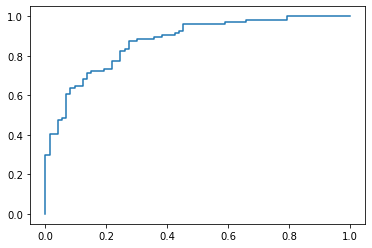

In [20]:
# ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='p1_winner')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(tpr,fpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
plt.show()

<font size = '4'><b>Apply AO trained model to US Open database to evaluate performance</b></font>

In [21]:
# The Objective is to check if the model trained with Austalian Open data can be used for the US Open
#Load parsed US Open Data
url = "https://raw.githubusercontent.com/ftkdev/ao_scraper_project/master/australian_open/extracts/usdata_final.csv"
df_us = pd.read_csv(url)
df_us = df_us.reindex(sorted(df_us.columns), axis=1)
df_us.shape

(1531, 47)

In [22]:
#Prepare database with same previous steps used above for AO db
# Fix calendar_year column
df_us['calendar_year'] = df_us['calendar_year'].str.replace('[', '', regex=True).str.replace(']', '', regex=True).astype(int)

#Create dependent variable y (winner)
conditions = [
    (df_us['player1_total_sets'] > df_us['player2_total_sets']),
    (df_us['player1_total_sets'] < df_us['player2_total_sets']),
    (df_us['player1_total_sets'] == df_us['player2_total_sets'])
]
values = ['p1_winner', 'p2_winner', 'not_applicable']

df_us['winner'] = np.select(conditions, values)
df_us = df_us.loc[(~df_us['winner'].isin(['not_applicable', '0'])), :]

# Remove null values
df_us = df_us.drop(['calendar_year', 'p1_max_games_row', 'p2_max_games_row', 'p1_servgames_won', 
         'p2_servgames_won', 'player1_1st_set',
       'player1_2nd_set', 'player1_3rd_set', 'player1_4th_set',
       'player1_5th_set', 'player1_country', 'player1_name', 'player1_seed',
       'player1_surname', 'player1_total_sets', 'player2_1st_set',
       'player2_2nd_set', 'player2_3rd_set', 'player2_4th_set',
       'player2_5th_set', 'player2_country', 'player2_name', 'player2_seed',
       'player2_surname', 'player2_total_sets', 'tournament',
       'tournament_phase', 'p1_tiebreaks_won', 'p2_tiebreaks_won'], axis=1)

df_us = df_us.dropna()

In [23]:
# Separate US Open samples to run in the model
y_us = df_us['winner']
X_us = df_us[ao_predictors]

In [24]:
y_pred_us = logreg.predict(X_us)
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_us, y_pred_us)
cnf_matrix

array([[295,  75],
       [ 63, 276]])

In [25]:
print("Accuracy:",metrics.accuracy_score(y_us, y_pred_us))
print("Precision:",metrics.precision_score(y_us, y_pred_us, pos_label='p1_winner'))
print("Recall:",metrics.recall_score(y_us, y_pred_us, pos_label='p1_winner'))

Accuracy: 0.8053596614950634
Precision: 0.8240223463687151
Recall: 0.7972972972972973


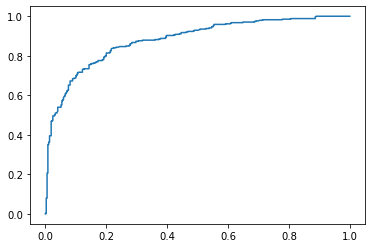

In [26]:
# ROC Curve
y_pred_proba_us = logreg.predict_proba(X_us)[::,1]
fpr_us, tpr_us, _ = metrics.roc_curve(y_us,  y_pred_proba_us, pos_label='p1_winner')
auc_us = metrics.roc_auc_score(y_us, y_pred_proba_us)
plt.plot(tpr_us,fpr_us,label="data 1, auc="+str(auc_us))
# plt.legend(loc=4)
plt.show()